In [1]:
! cp /content/drive/MyDrive/mask\ detection/Dataset_preprocessing.py /content

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from keras.models import Sequential , Model
from keras.layers import Conv2D , MaxPooling2D , Dense , Dropout , Activation , AveragePooling2D , Flatten
from tensorflow.keras.optimizers import Adam , RMSprop, SGD
from keras.applications.mobilenet_v2 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from Dataset_preprocessing import *
from IPython.display import Image

# Face Mask Detection

## Objective 

The project is a part of safty system against the COVID19. The system is to detect either a person is wearing a face mask or not.


### Preprocessing

loading the dataset and preprocess the images and convert the images into array and perform one hot encoding to the labels.

Steps:
1. load all images from their path according to their category
2. resize the image to (224 , 224 , 3)  `(height , Width , Color channels)`
3. turn the images into array
4. add the image to data list 
5. add their category to the labels list
6. perform onehot encoding to the labels
7. convert the images into tensors
8. convert the labels into tensors


In [3]:
Dataset_File_Path = r"/content/drive/MyDrive/mask detection/dataset"
os.listdir(Dataset_File_Path)

['without_mask', 'with_mask']

In [4]:
Categories = ['without_mask', 'with_mask']

In [5]:
TARGET_SIZE = (224 , 224)

In [6]:
Images , Labels = Load_images(FilePath=Dataset_File_Path , Categories=Categories , Target_Size=TARGET_SIZE )

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


## Visualizing Some images

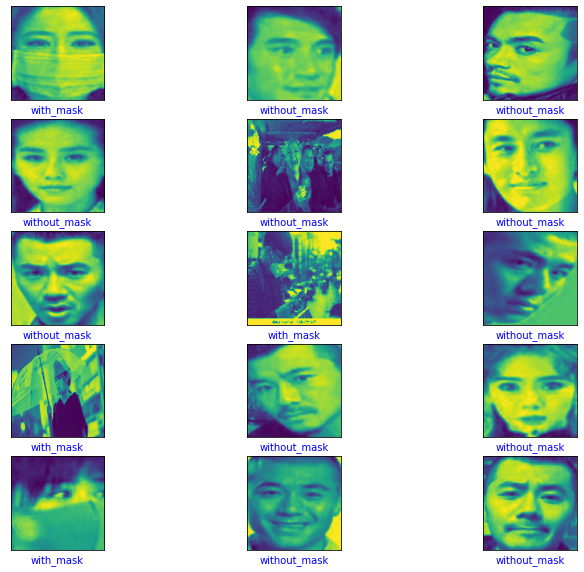

In [7]:
import random
n_rows = 5
n_cols = 3

sample = np.random.choice(len(Images), size = n_rows*n_cols, replace=False)
plt.figure(figsize=(2*2*n_cols, 2*n_rows))
for i in range(len(sample)):
  plt.subplot(n_rows , n_cols , i+1)
  Plot_Image(sample[i],Images, Labels)

In [8]:
Images , Labels = Preprocess_Data(Images=Images , Labels=Labels , Categories=Categories)

In [9]:
DataAugmentaion = ImageDataGenerator(
                                  horizontal_flip = True,
                                  zoom_range = 0.3,
                                  rotation_range = 40
                                    )

In [10]:
train_images , test_images , train_labels , test_labels =  train_test_split(Images , Labels , test_size = 0.3 , shuffle = True , random_state = 42)

In [11]:
BATCH_SIZE = 32
EPOCHS = 100
INIT_LR = 1e-2

In [12]:
Model_baseline = Sequential()
Model_baseline.add(Conv2D(filters = 16 , kernel_size = 5 , padding = 'same' , input_shape = (224,224,3)))
Model_baseline.add(Activation('relu'))
Model_baseline.add(MaxPooling2D(pool_size=(2, 2) , strides = 2))

Model_baseline.add(Conv2D(filters = 32 , kernel_size = 5 , padding = 'same'))
Model_baseline.add(Activation('relu'))
Model_baseline.add(MaxPooling2D(pool_size=(2, 2) , strides = 2))

Model_baseline.add(Conv2D(filters = 64 , kernel_size = 5 , padding = 'same'))
Model_baseline.add(Activation('relu'))
Model_baseline.add(MaxPooling2D(pool_size=(2, 2) , strides = 2))

Model_baseline.add(Dropout(0.5))

Model_baseline.add(Flatten())
Model_baseline.add(Dense(64))
Model_baseline.add(Activation('relu'))

Model_baseline.add(Dropout(0.5))
Model_baseline.add(Dense(2))
Model_baseline.add(Activation('softmax'))

In [13]:
opt = Adam()
Model_baseline.compile(optimizer = opt,
                      loss = tf.keras.losses.CategoricalCrossentropy(), 
                      metrics = ['accuracy'])

In [14]:
Model_baseline.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      1216      
                                                                 
 activation (Activation)     (None, 224, 224, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      12832     
                                                                 
 activation_1 (Activation)   (None, 112, 112, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                    

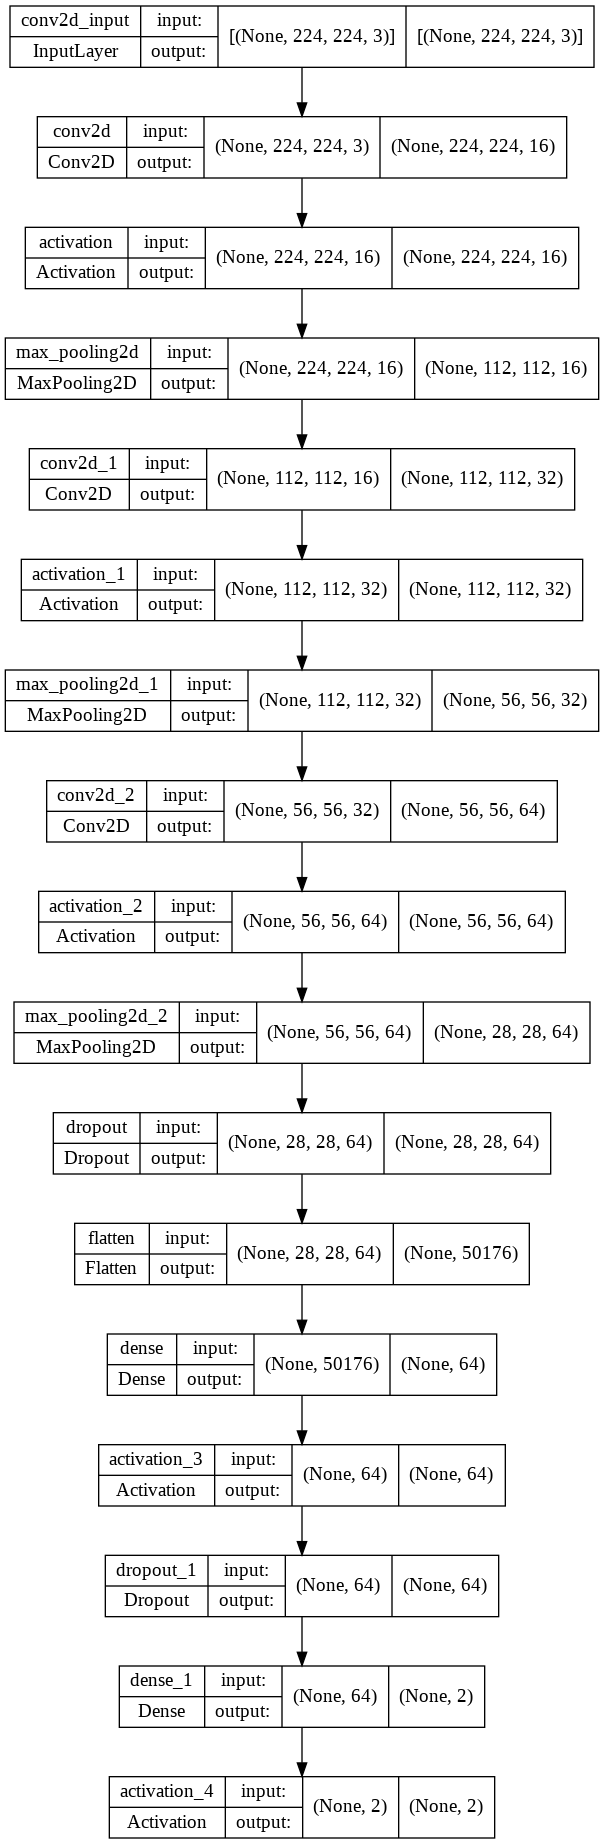

In [15]:
plot_model(Model_baseline, show_shapes=True, show_layer_names=True, to_file='/content/drive/MyDrive/mask detection/Model_baseline.png')
Image(retina=True, filename='/content/drive/MyDrive/mask detection/Model_baseline.png')

In [16]:
CheckPoint = ModelCheckpoint("/content/drive/MyDrive/mask detection/MASK_CNN.hdf5" , 
                            save_best_only = True, 
                            verbose = 1)

In [17]:
Model_base_Hist = Model_baseline.fit(DataAugmentaion.flow(train_images  , train_labels , batch_size=BATCH_SIZE),
                  epochs = EPOCHS , 
                  steps_per_epoch = len(train_images)//BATCH_SIZE , 
                  validation_data = (test_images , test_labels),
                  validation_steps = len(test_images) // BATCH_SIZE,
                  callbacks = [CheckPoint]
                  )

Epoch 1/100
83/83 [==============================] - ETA: 0s - loss: 0.3744 - accuracy: 0.8416
Epoch 1: val_loss improved from inf to 0.19478, saving model to /content/drive/MyDrive/mask detection/MASK_CNN.hdf5
83/83 [==============================] - 42s 354ms/step - loss: 0.3744 - accuracy: 0.8416 - val_loss: 0.1948 - val_accuracy: 0.9217
Epoch 2/100
83/83 [==============================] - ETA: 0s - loss: 0.2840 - accuracy: 0.9008
Epoch 2: val_loss did not improve from 0.19478
83/83 [==============================] - 27s 330ms/step - loss: 0.2840 - accuracy: 0.9008 - val_loss: 0.2490 - val_accuracy: 0.9096
Epoch 3/100
83/83 [==============================] - ETA: 0s - loss: 0.2446 - accuracy: 0.9155
Epoch 3: val_loss did not improve from 0.19478
83/83 [==============================] - 27s 330ms/step - loss: 0.2446 - accuracy: 0.9155 - val_loss: 0.2304 - val_accuracy: 0.9122
Epoch 4/100
83/83 [==============================] - ETA: 0s - loss: 0.2310 - accuracy: 0.9246
Epoch 4: val_l

In [37]:
Model_baseline.load_weights(filepath="/content/drive/MyDrive/mask detection/MASK_CNN.hdf5")

In [39]:
Model_baseline.evaluate(test_images , test_labels)

36/36 [==============================] - 1s 23ms/step - loss: 0.0758 - accuracy: 0.9722


[0.07579824328422546, 0.9721739292144775]

In [40]:
y_Preds = Model_baseline.predict(test_images)

In [41]:
y_Preds_Class_index = np.argmax(y_Preds , axis = -1).astype('int32')

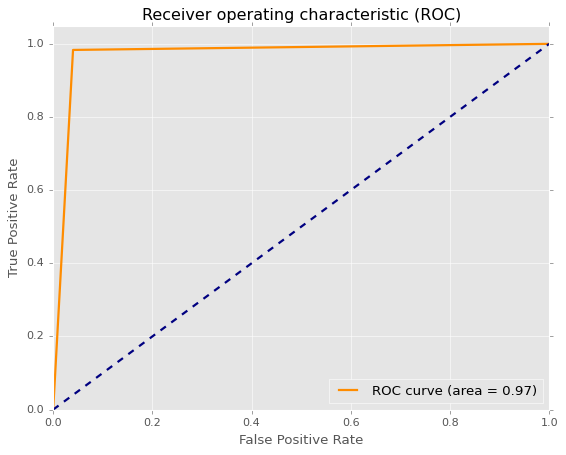

In [42]:
Plot_ROC(test_labels , y_Preds)

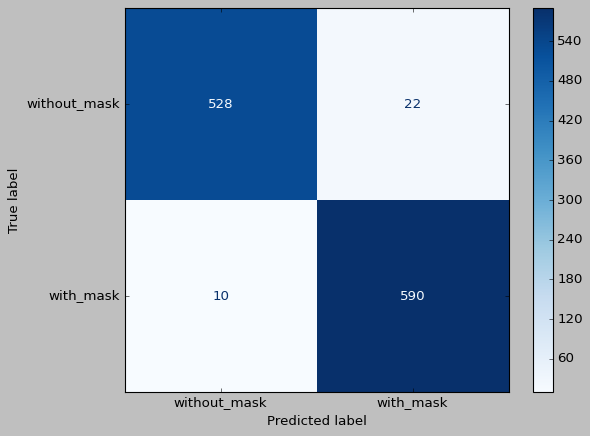

In [44]:
Plot_Confusion_Matrix(test_labels , y_Preds , Categories)

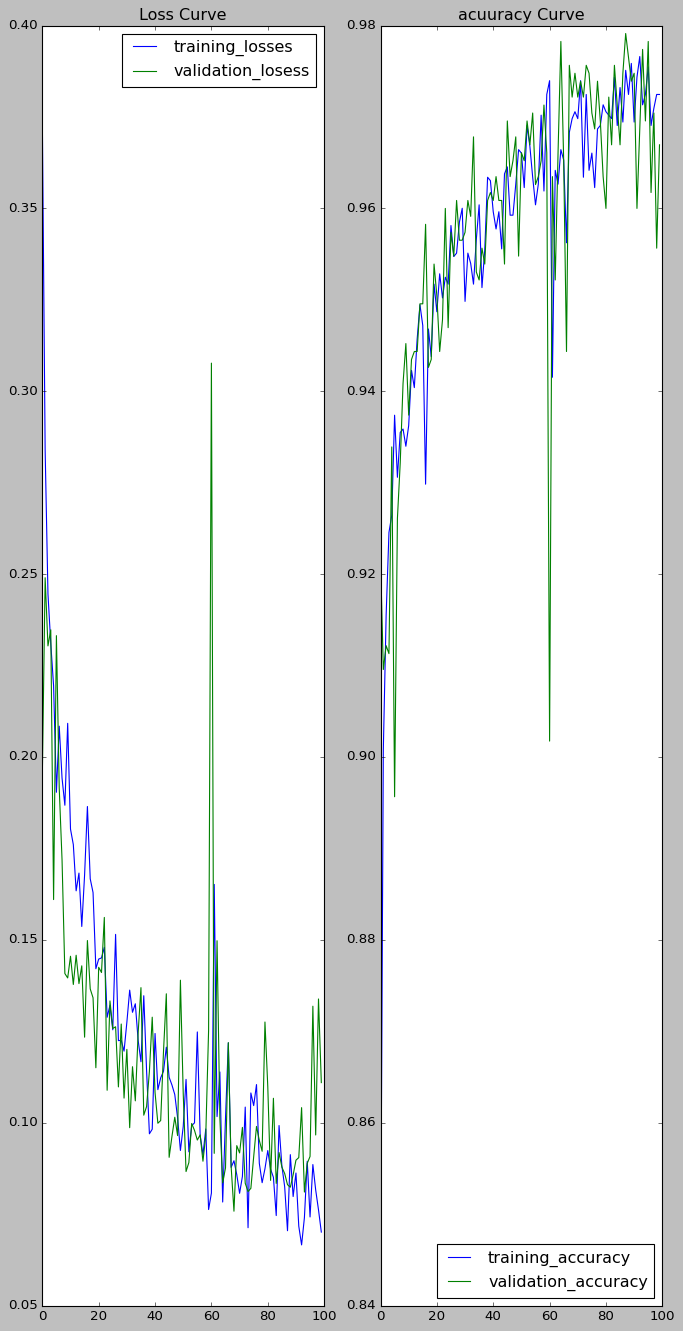

In [45]:
Plot_Model_History(Model_History=Model_base_Hist , epochs = EPOCHS)

In [46]:
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [47]:
Lr = 1e-4
EPOCHS = 10
opt = Adam(learning_rate = Lr , decay=Lr / EPOCHS)
Model_baseline.compile(optimizer = opt,
                      loss = tf.keras.losses.CategoricalCrossentropy(), 
                      metrics = ['accuracy'])

Model_base_Hist = Model_baseline.fit(aug.flow(train_images  , train_labels , batch_size=BATCH_SIZE),
                  epochs = EPOCHS , 
                  steps_per_epoch = len(train_images)//BATCH_SIZE , 
                  validation_data = (test_images , test_labels),
                  validation_steps = len(test_images) // BATCH_SIZE,
                   callbacks = [CheckPoint]
                  )

Epoch 1/10
83/83 [==============================] - ETA: 0s - loss: 0.2461 - accuracy: 0.9344
Epoch 1: val_loss did not improve from 0.07580
83/83 [==============================] - 33s 386ms/step - loss: 0.2461 - accuracy: 0.9344 - val_loss: 0.0794 - val_accuracy: 0.9722
Epoch 2/10
83/83 [==============================] - ETA: 0s - loss: 0.2196 - accuracy: 0.9298
Epoch 2: val_loss did not improve from 0.07580
83/83 [==============================] - 31s 375ms/step - loss: 0.2196 - accuracy: 0.9298 - val_loss: 0.0818 - val_accuracy: 0.9757
Epoch 3/10
83/83 [==============================] - ETA: 0s - loss: 0.2026 - accuracy: 0.9313
Epoch 3: val_loss did not improve from 0.07580
83/83 [==============================] - 30s 356ms/step - loss: 0.2026 - accuracy: 0.9313 - val_loss: 0.0810 - val_accuracy: 0.9730
Epoch 4/10
83/83 [==============================] - ETA: 0s - loss: 0.1965 - accuracy: 0.9325
Epoch 4: val_loss did not improve from 0.07580
83/83 [==============================] -

In [55]:
Model_1 = Sequential()
Model_1.add(Conv2D(filters = 32 , kernel_size = 3 , padding = 'same' , input_shape = (224,224,3)))
Model_1.add(Activation('relu'))
Model_1.add(MaxPooling2D(pool_size=(2, 2) , strides = 2))

Model_1.add(Conv2D(filters = 64 , kernel_size = 3 , padding = 'same'))
Model_1.add(Activation('relu'))
Model_1.add(MaxPooling2D(pool_size=(2, 2) , strides = 2))

Model_1.add(Conv2D(filters = 128 , kernel_size = 3 , padding = 'same'))
Model_1.add(Activation('relu'))
Model_1.add(MaxPooling2D(pool_size=(2, 2) , strides = 2))

Model_1.add(Dropout(0.5))

Model_1.add(Flatten())
Model_1.add(Dense(64))
Model_1.add(Activation('relu'))
Model_1.add(Dropout(0.3))
Model_1.add(Dense(2))
Model_1.add(Activation('softmax'))

In [56]:
Model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 activation_10 (Activation)  (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 activation_11 (Activation)  (None, 112, 112, 64)      0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                  

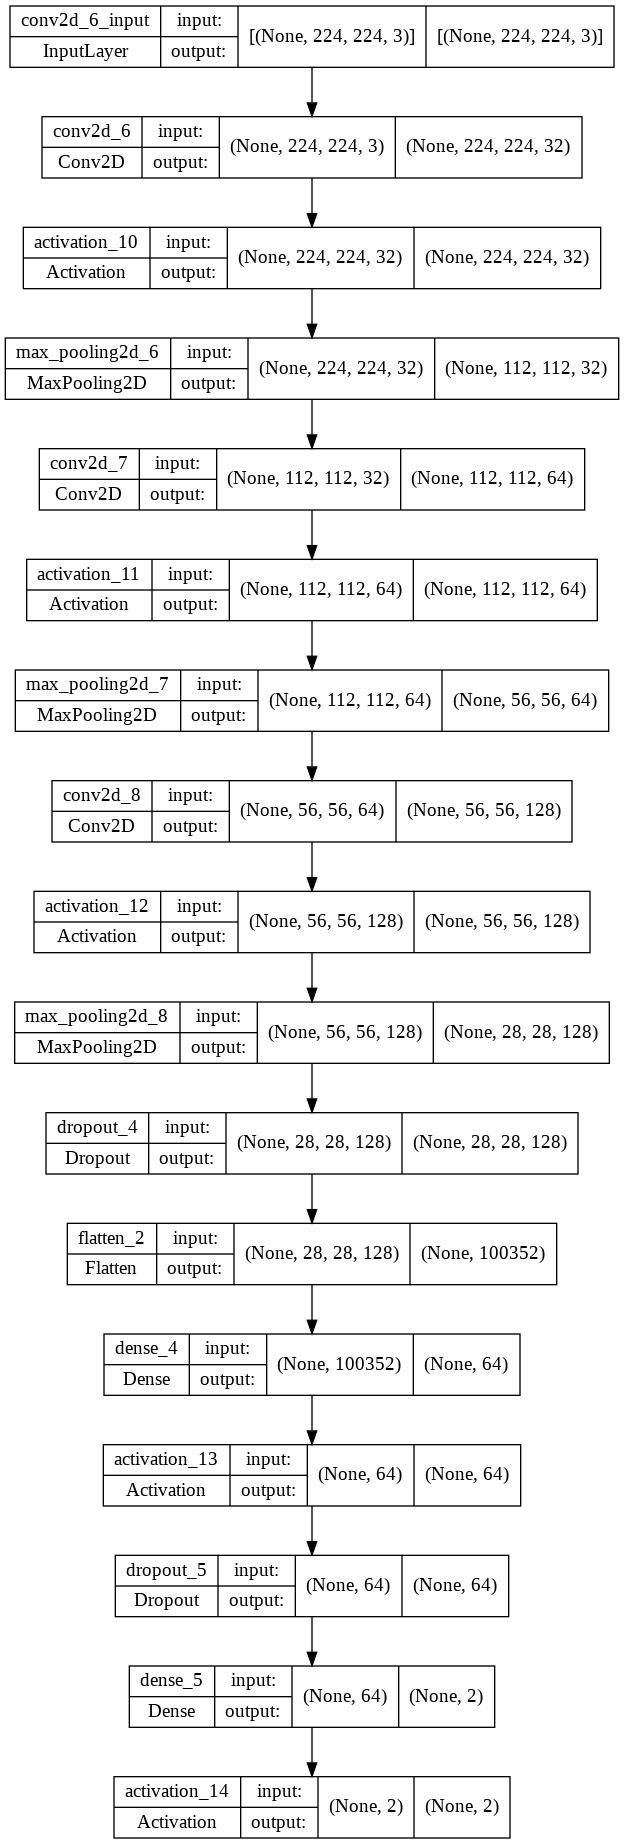

In [73]:
plot_model(Model_1, show_shapes=True, show_layer_names=True, to_file='/content/drive/MyDrive/mask detection/Model_1.png')
Image(retina=True, filename='/content/drive/MyDrive/mask detection/Model_1.png')

In [58]:
opt = SGD()
Model_1.compile(optimizer = opt,
                      loss = tf.keras.losses.CategoricalCrossentropy(), 
                      metrics = ['accuracy'])

In [59]:
CheckPoint1 = ModelCheckpoint("MASK_CNN_1.hdf5" , 
                            save_best_only = True, 
                            verbose = 1)

In [60]:
Model_1_Hist = Model_1.fit(DataAugmentaion.flow(train_images  , train_labels , batch_size=BATCH_SIZE),
                  epochs = 100 , 
                  steps_per_epoch = len(train_images)//BATCH_SIZE , 
                  validation_data = (test_images , test_labels),
                  validation_steps = len(test_images) // BATCH_SIZE,
                   callbacks = [CheckPoint1]
                  )

Epoch 1/100
83/83 [==============================] - ETA: 0s - loss: 0.6333 - accuracy: 0.6409
Epoch 1: val_loss improved from inf to 0.51209, saving model to MASK_CNN_1.hdf5
83/83 [==============================] - 30s 353ms/step - loss: 0.6333 - accuracy: 0.6409 - val_loss: 0.5121 - val_accuracy: 0.7496
Epoch 2/100
83/83 [==============================] - ETA: 0s - loss: 0.4153 - accuracy: 0.8314
Epoch 2: val_loss improved from 0.51209 to 0.31411, saving model to MASK_CNN_1.hdf5
83/83 [==============================] - 28s 343ms/step - loss: 0.4153 - accuracy: 0.8314 - val_loss: 0.3141 - val_accuracy: 0.8678
Epoch 3/100
83/83 [==============================] - ETA: 0s - loss: 0.2899 - accuracy: 0.8951
Epoch 3: val_loss improved from 0.31411 to 0.28676, saving model to MASK_CNN_1.hdf5
83/83 [==============================] - 29s 344ms/step - loss: 0.2899 - accuracy: 0.8951 - val_loss: 0.2868 - val_accuracy: 0.8843
Epoch 4/100
83/83 [==============================] - ETA: 0s - loss: 0.

In [61]:
Model_1.load_weights(filepath="/content/MASK_CNN_1.hdf5")

In [62]:
Model_1.evaluate(test_images , test_labels)

36/36 [==============================] - 1s 40ms/step - loss: 0.0893 - accuracy: 0.9704


[0.08928143233060837, 0.9704347848892212]

In [64]:
y_Preds = Model_1.predict(test_images)

In [65]:
y_Preds_Class_index = np.argmax(y_Preds , axis = -1).astype('int32')

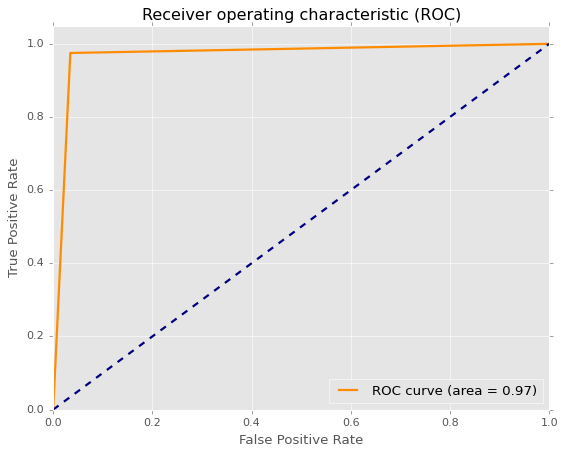

In [66]:
Plot_ROC(test_labels , y_Preds)

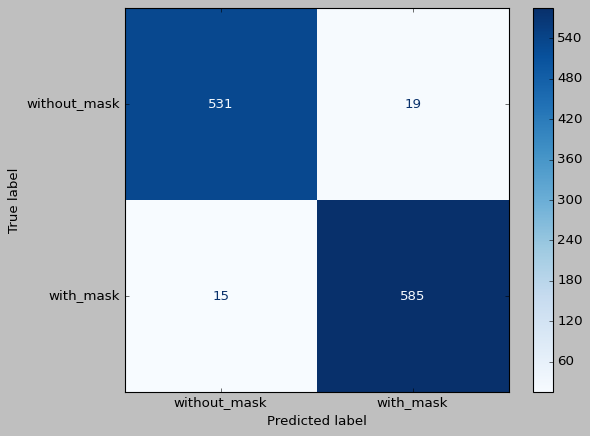

In [67]:
Plot_Confusion_Matrix(test_labels , y_Preds , Categories)

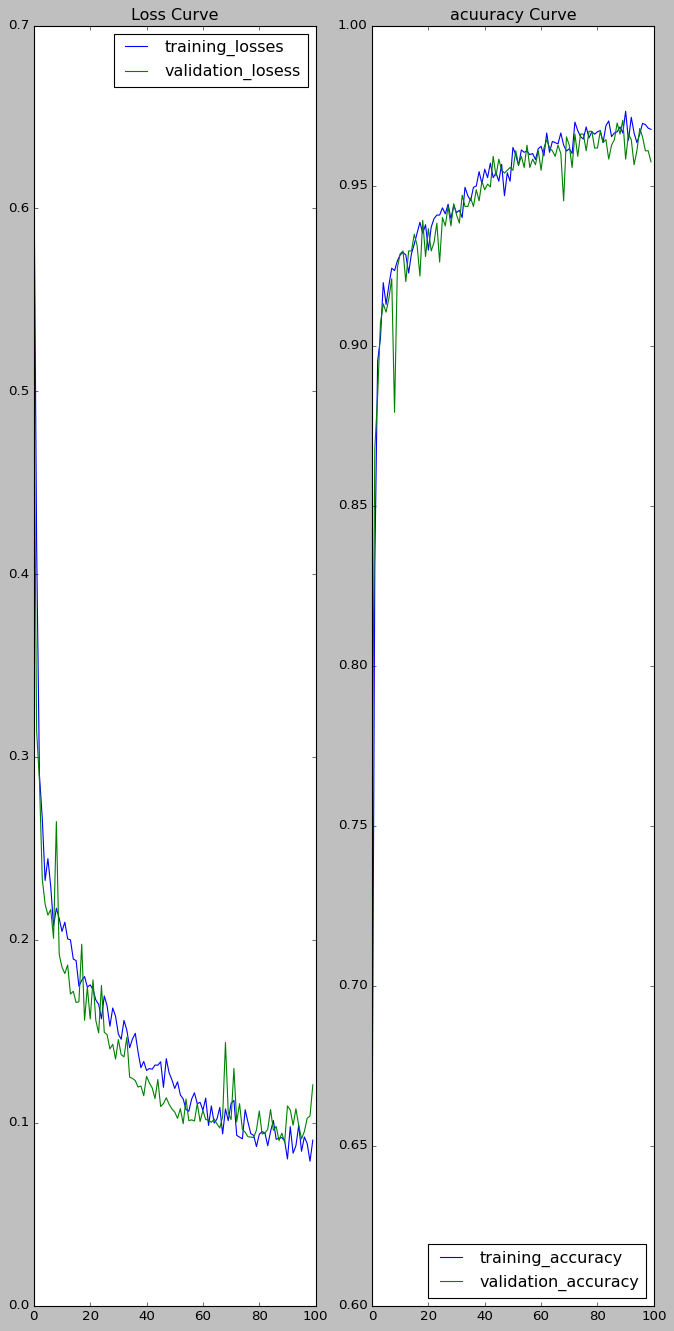

In [68]:
Plot_Model_History(Model_History=Model_1_Hist , epochs = 100)

In [77]:
Model_2 = Sequential()
Model_2.add(Conv2D(filters = 32 , kernel_size = 3 , padding = 'same' , input_shape = (224,224,3)))
Model_2.add(Activation('relu'))
Model_2.add(MaxPooling2D(pool_size=(2, 2) , strides = 2))

Model_2.add(Conv2D(filters = 64 , kernel_size = 3 , padding = 'same'))
Model_2.add(Activation('relu'))
Model_2.add(MaxPooling2D(pool_size=(2, 2) , strides = 2))

Model_2.add(Conv2D(filters = 64 , kernel_size = 3 , padding = 'same'))
Model_2.add(Activation('relu'))
Model_2.add(MaxPooling2D(pool_size=(2, 2) , strides = 2))

Model_2.add(Dropout(0.5))

Model_2.add(Conv2D(filters = 128 , kernel_size = 3 , padding = 'same'))
Model_2.add(Activation('relu'))
Model_2.add(MaxPooling2D(pool_size=(2, 2) , strides = 2))

Model_2.add(Conv2D(filters = 128 , kernel_size = 3 , padding = 'same'))
Model_2.add(Activation('relu'))
Model_2.add(MaxPooling2D(pool_size=(2, 2) , strides = 2))

Model_2.add(Conv2D(filters = 256 , kernel_size = 3 , padding = 'same'))
Model_2.add(Activation('relu'))
Model_2.add(MaxPooling2D(pool_size=(2, 2) , strides = 2))


Model_2.add(Dropout(0.5))

Model_2.add(Flatten())
Model_2.add(Dense(128))
Model_2.add(Activation('relu'))
Model_2.add(Dropout(0.3))
Model_2.add(Dense(2))
Model_2.add(Activation('softmax'))

In [78]:
opt = Adam()
Model_2.compile(optimizer = opt,
                      loss = tf.keras.losses.CategoricalCrossentropy(), 
                      metrics = ['accuracy'])

In [79]:
Model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 activation_23 (Activation)  (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 activation_24 (Activation)  (None, 112, 112, 64)      0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                 

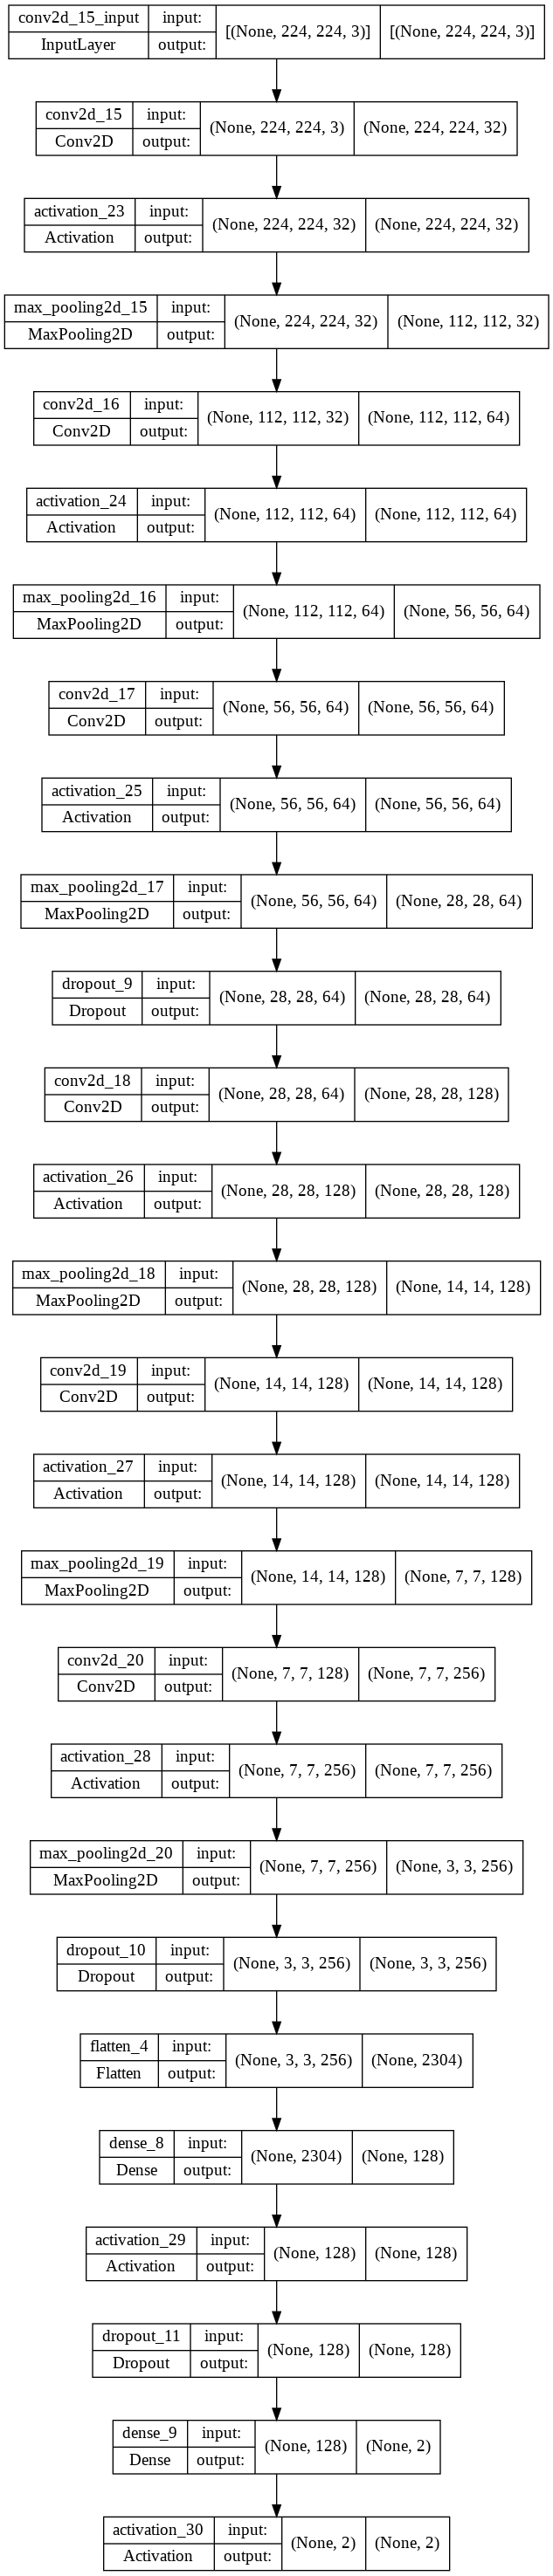

In [80]:
plot_model(Model_2, show_shapes=True, show_layer_names=True, to_file='/content/drive/MyDrive/mask detection/Model_2.png')
Image(retina=True, filename='/content/drive/MyDrive/mask detection/Model_2.png')

In [81]:
CheckPoint2 = ModelCheckpoint("MASK-CNN_2.hdf5" , 
                            save_best_only = True, 
                            verbose = 1)

In [82]:
Model_2_Hist = Model_2.fit(DataAugmentaion.flow(train_images  , train_labels , batch_size=BATCH_SIZE),
                  epochs = 100 , 
                  steps_per_epoch = len(train_images)//BATCH_SIZE , 
                  validation_data = (test_images , test_labels),
                  validation_steps = len(test_images) // BATCH_SIZE,
                   callbacks = [CheckPoint2]
                  )

Epoch 1/100
83/83 [==============================] - ETA: 0s - loss: 0.4193 - accuracy: 0.7978
Epoch 1: val_loss improved from inf to 0.22311, saving model to MASK-CNN_2.hdf5
83/83 [==============================] - 32s 375ms/step - loss: 0.4193 - accuracy: 0.7978 - val_loss: 0.2231 - val_accuracy: 0.9165
Epoch 2/100
83/83 [==============================] - ETA: 0s - loss: 0.2290 - accuracy: 0.9208
Epoch 2: val_loss improved from 0.22311 to 0.19503, saving model to MASK-CNN_2.hdf5
83/83 [==============================] - 30s 364ms/step - loss: 0.2290 - accuracy: 0.9208 - val_loss: 0.1950 - val_accuracy: 0.9287
Epoch 3/100
83/83 [==============================] - ETA: 0s - loss: 0.2079 - accuracy: 0.9344
Epoch 3: val_loss did not improve from 0.19503
83/83 [==============================] - 29s 349ms/step - loss: 0.2079 - accuracy: 0.9344 - val_loss: 0.2111 - val_accuracy: 0.9365
Epoch 4/100
83/83 [==============================] - ETA: 0s - loss: 0.1991 - accuracy: 0.9276
Epoch 4: val_

In [83]:
Model_2.load_weights("/content/MASK-CNN_2.hdf5")

In [84]:
Model_2.evaluate(test_images , test_labels)

36/36 [==============================] - 1s 39ms/step - loss: 0.0487 - accuracy: 0.9870


[0.04869315028190613, 0.9869565367698669]

In [86]:
y_Preds = Model_2.predict(test_images)

In [87]:
y_Preds_Class_index = np.argmax(y_Preds , axis = -1).astype('int32')

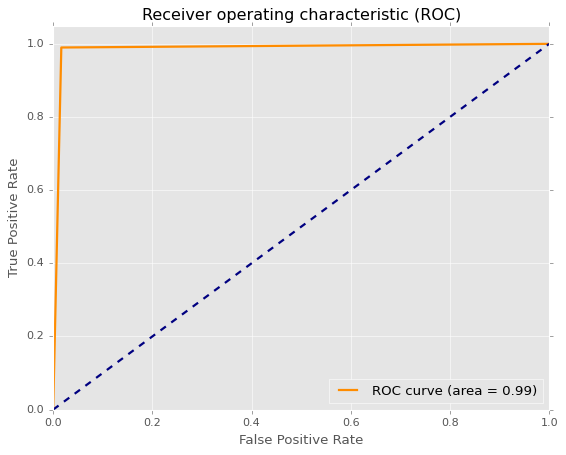

In [88]:
Plot_ROC(test_labels , y_Preds)

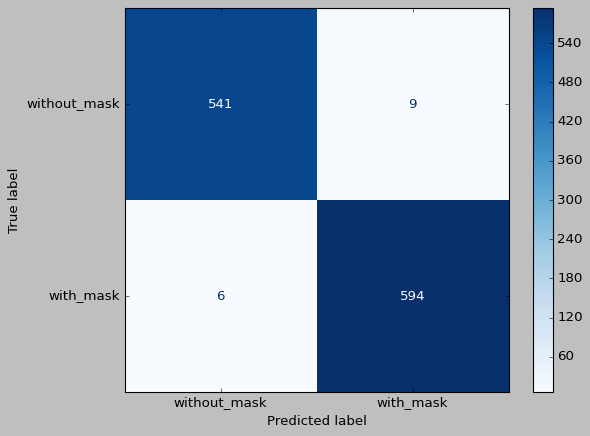

In [89]:
Plot_Confusion_Matrix(test_labels , y_Preds , Categories)

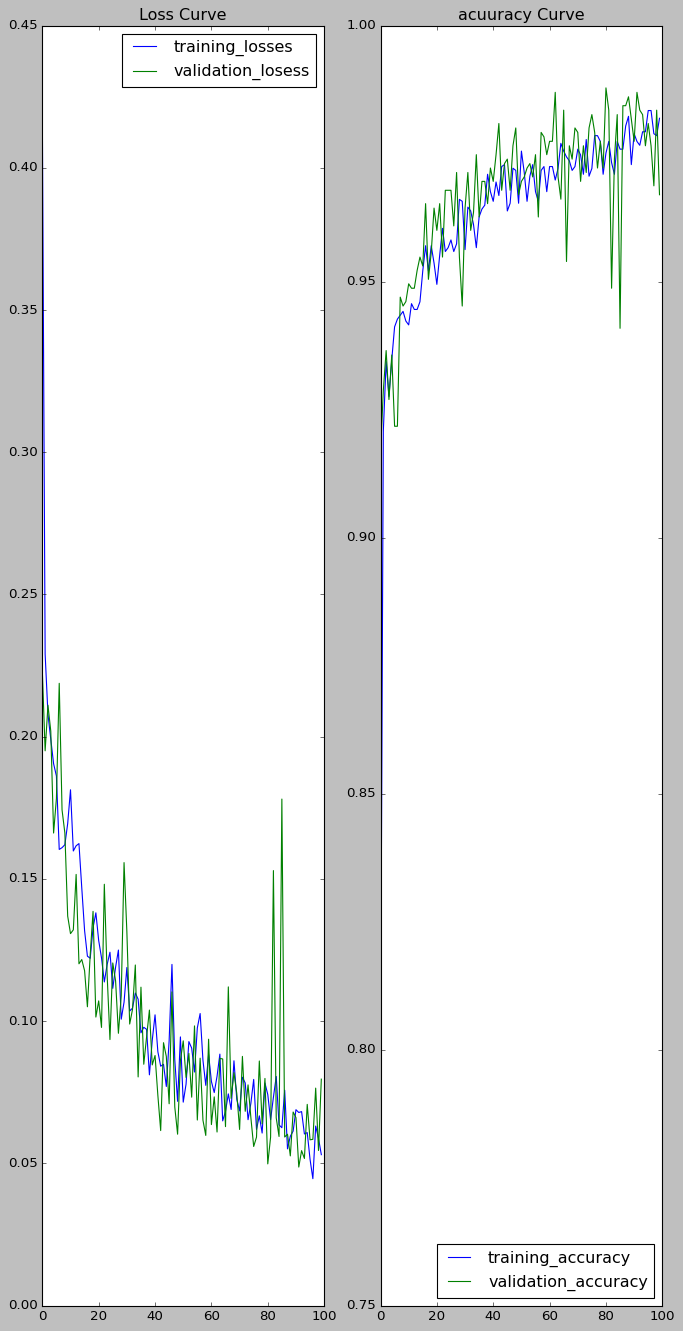

In [90]:
Plot_Model_History(Model_History=Model_2_Hist , epochs = 100)